import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df = df.drop("CustomerID", axis=1)
df.columns = ["Gender", "Age", "Income", "Spending"]

df

,Gender,Age,Income,Spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [3]:
dummies = pd.get_dummies(df["Gender"])
dummies = dummies.astype(int)
df = df.merge(dummies, left_index=True, right_index=True)
df = df.drop("Gender", axis=1)
df.head()

,Age,Income,Spending,Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [4]:
df = df.drop("Female",axis=1)
y=df["Income"]
x=df.drop("Income", axis=1)
print(x)
print(y)

     Age  Spending  Male
0     19        39     1
1     21        81     1
2     20         6     0
3     23        77     0
4     31        40     0
..   ...       ...   ...
195   35        79     0
196   45        28     0
197   32        74     1
198   32        18     1
199   30        83     1

[200 rows x 3 columns]
0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Income, Length: 200, dtype: int64


In [5]:
#OLS 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

print("R2 score OLS: {}" .format(reg_all.score(X_test, y_test)))
print("OLS coefficinets: {}" .format(reg_all.coef_))

R2 score OLS: -0.018620188538703175
OLS coefficinets: [-0.01736265  0.06371959  1.21421328]


In [6]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error for OLS: {}".format(rmse))
mean_error = np.mean((y_test - y_pred))
print("Mean Error OLS: {}".format(mean_error))

Root Mean Squared Error for OLS: 23.987033991262276
Mean Error OLS: 1.2392299518521885


In [7]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_results = cross_val_score(reg, x, y, cv=5, scoring="neg_mean_squared_error")
cv_results1 = cross_val_score(reg, x, y, cv=5, scoring="r2")
print(cv_results)
print("Average 5-Fold CV Score OLS: {}".format(np.mean(cv_results1)))
print("Average 5-Fold CV Score OLS: {}".format(np.mean(cv_results)))

[-2239.49588258  -410.28946876   -19.92468173  -306.59668348
 -2412.95131382]
Average 5-Fold CV Score OLS: -20.384969820244766
Average 5-Fold CV Score OLS: -1077.8516060733411


In [8]:
#Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("R2 score Ridge: {}".format(ridge.score(X_test, y_test)))
print("Coefficients Ridge: {}".format(ridge.coef_))


R2 score Ridge: -0.01863964065286261
Coefficients Ridge: [-0.0173569   0.06371947  1.21072081]


In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

RidgeRegression = Ridge()
hyperParameters = {'alpha':np.logspace(-4, 0, 100)}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='r2', cv=5)
ridgeRegressor.fit(x,y)
print("Best value for alpha : ",ridgeRegressor.best_params_)
print("Best R2 score : ", ridgeRegressor.best_score_)

Best value for alpha :  {'alpha': 1.0}
Best R2 score :  -20.384416453088626


In [10]:
from sklearn.linear_model import Ridge

RidgeRegression = Ridge()
hyperParameters = {'alpha':np.logspace(-4, 0, 50)}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
ridgeRegressor.fit(x,y)
print("Best value for alpha : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for alpha :  {'alpha': 0.0001}
Best score for cost function:  -1077.851611864611


In [11]:
#Lasso Regression

from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print(" Score Lasso: {}".format(lasso.score(X_test, y_test)))

 Score Lasso: -0.020881666083745865


In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
LassoRegression = Lasso()
hyperParameters = {'alpha':np.logspace(-4, 0, 50)}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='r2', cv=5)
LassoRegressor.fit(x,y)
print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score for R2: ", LassoRegressor.best_score_)

Best value for alpha :  {'alpha': 0.023299518105153717}
Best score for R2:  -20.384878822250855


In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
LassoRegression = Lasso()
hyperParameters = {'alpha':np.logspace(-4, 0, 50)}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
LassoRegressor.fit(x,y)
print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for alpha :  {'alpha': 0.0001}
Best score for cost function:  -1077.852012390514


C:\Users\Halil Tunçer\AppData\Local\Temp\ipykernel_9228\1134836189.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predict_ridge)


<Axes: xlabel='Income', ylabel='Density'>

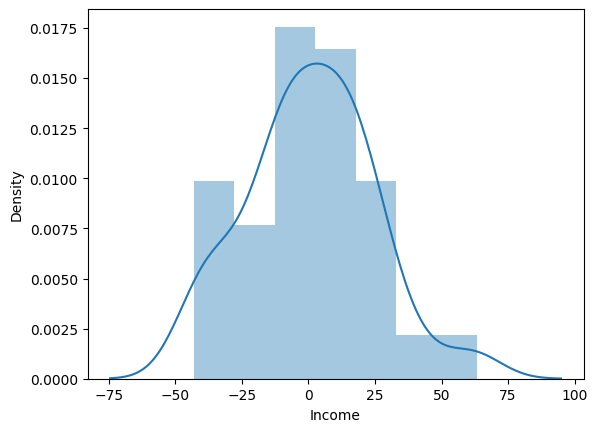

In [14]:
predict_ridge = ridgeRegressor.predict(X_test)
predict_lasso = LassoRegressor.predict(X_test)
sns.distplot(y_test-predict_ridge)


C:\Users\Halil Tunçer\AppData\Local\Temp\ipykernel_9228\219328168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predict_lasso)


<Axes: xlabel='Income', ylabel='Density'>

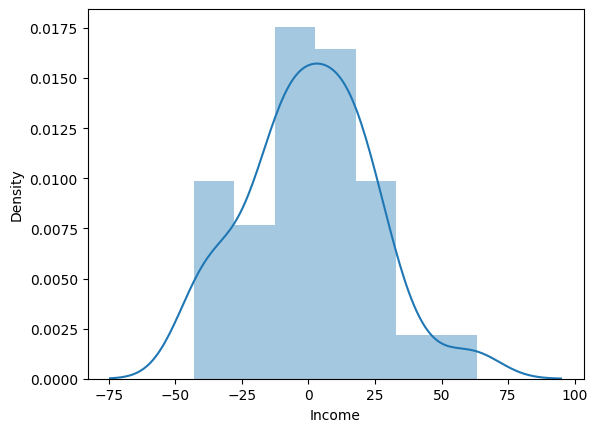

In [15]:
sns.distplot(y_test-predict_lasso)

In [16]:
#KNneighbour


y_dummy = pd.cut(y, 2, labels=[0,1])
y_dummy = np.array(y_dummy)
y_dummy


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y_dummy)

KNeighborsClassifier()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_dummy, test_size=0.3, random_state=21)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print("KNN Score: {}".format(knn.score(X_test, y_test)))

KNN Score: 0.65


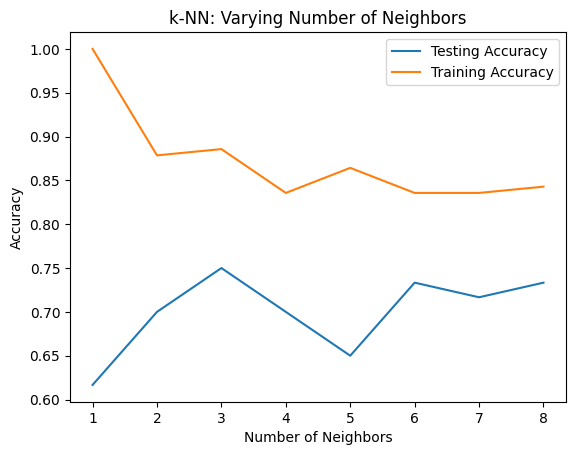

In [19]:

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):

    
    knn = KNeighborsClassifier(n_neighbors=k)

    
    knn.fit(X_train, y_train)
    
    
    train_accuracy[i] = knn.score(X_train, y_train)

    
    test_accuracy[i] = knn.score(X_test, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(x, y_dummy)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 16}
0.76


In [21]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(x, y_dummy, random_state=42,test_size=0.4)


knn = KNeighborsClassifier(n_neighbors=16)


knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[53  9]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        62
           1       0.55      0.61      0.58        18

    accuracy                           0.80        80
   macro avg       0.72      0.73      0.72        80
weighted avg       0.81      0.80      0.80        80



In [22]:
#DecisionTree
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(max_depth=15)

X_train, X_test, y_train, y_test = train_test_split(x, y_dummy, test_size=0.3, random_state=42)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_prob = clf.predict_proba
print('Depth of the Decision Tree :', clf.get_depth())
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')



Depth of the Decision Tree : 13
Accuracy: 0.8166666666666667


In [23]:
from sklearn import tree
L = []
for i in range(1,15):
    dtree = tree.DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    L.append(round(accuracy_score(y_test,y_pred),5))
print(L.index(max(L)))
print(max(L))

6
0.81667


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.61      0.73      0.67        15

    accuracy                           0.82        60
   macro avg       0.76      0.79      0.77        60
weighted avg       0.83      0.82      0.82        60



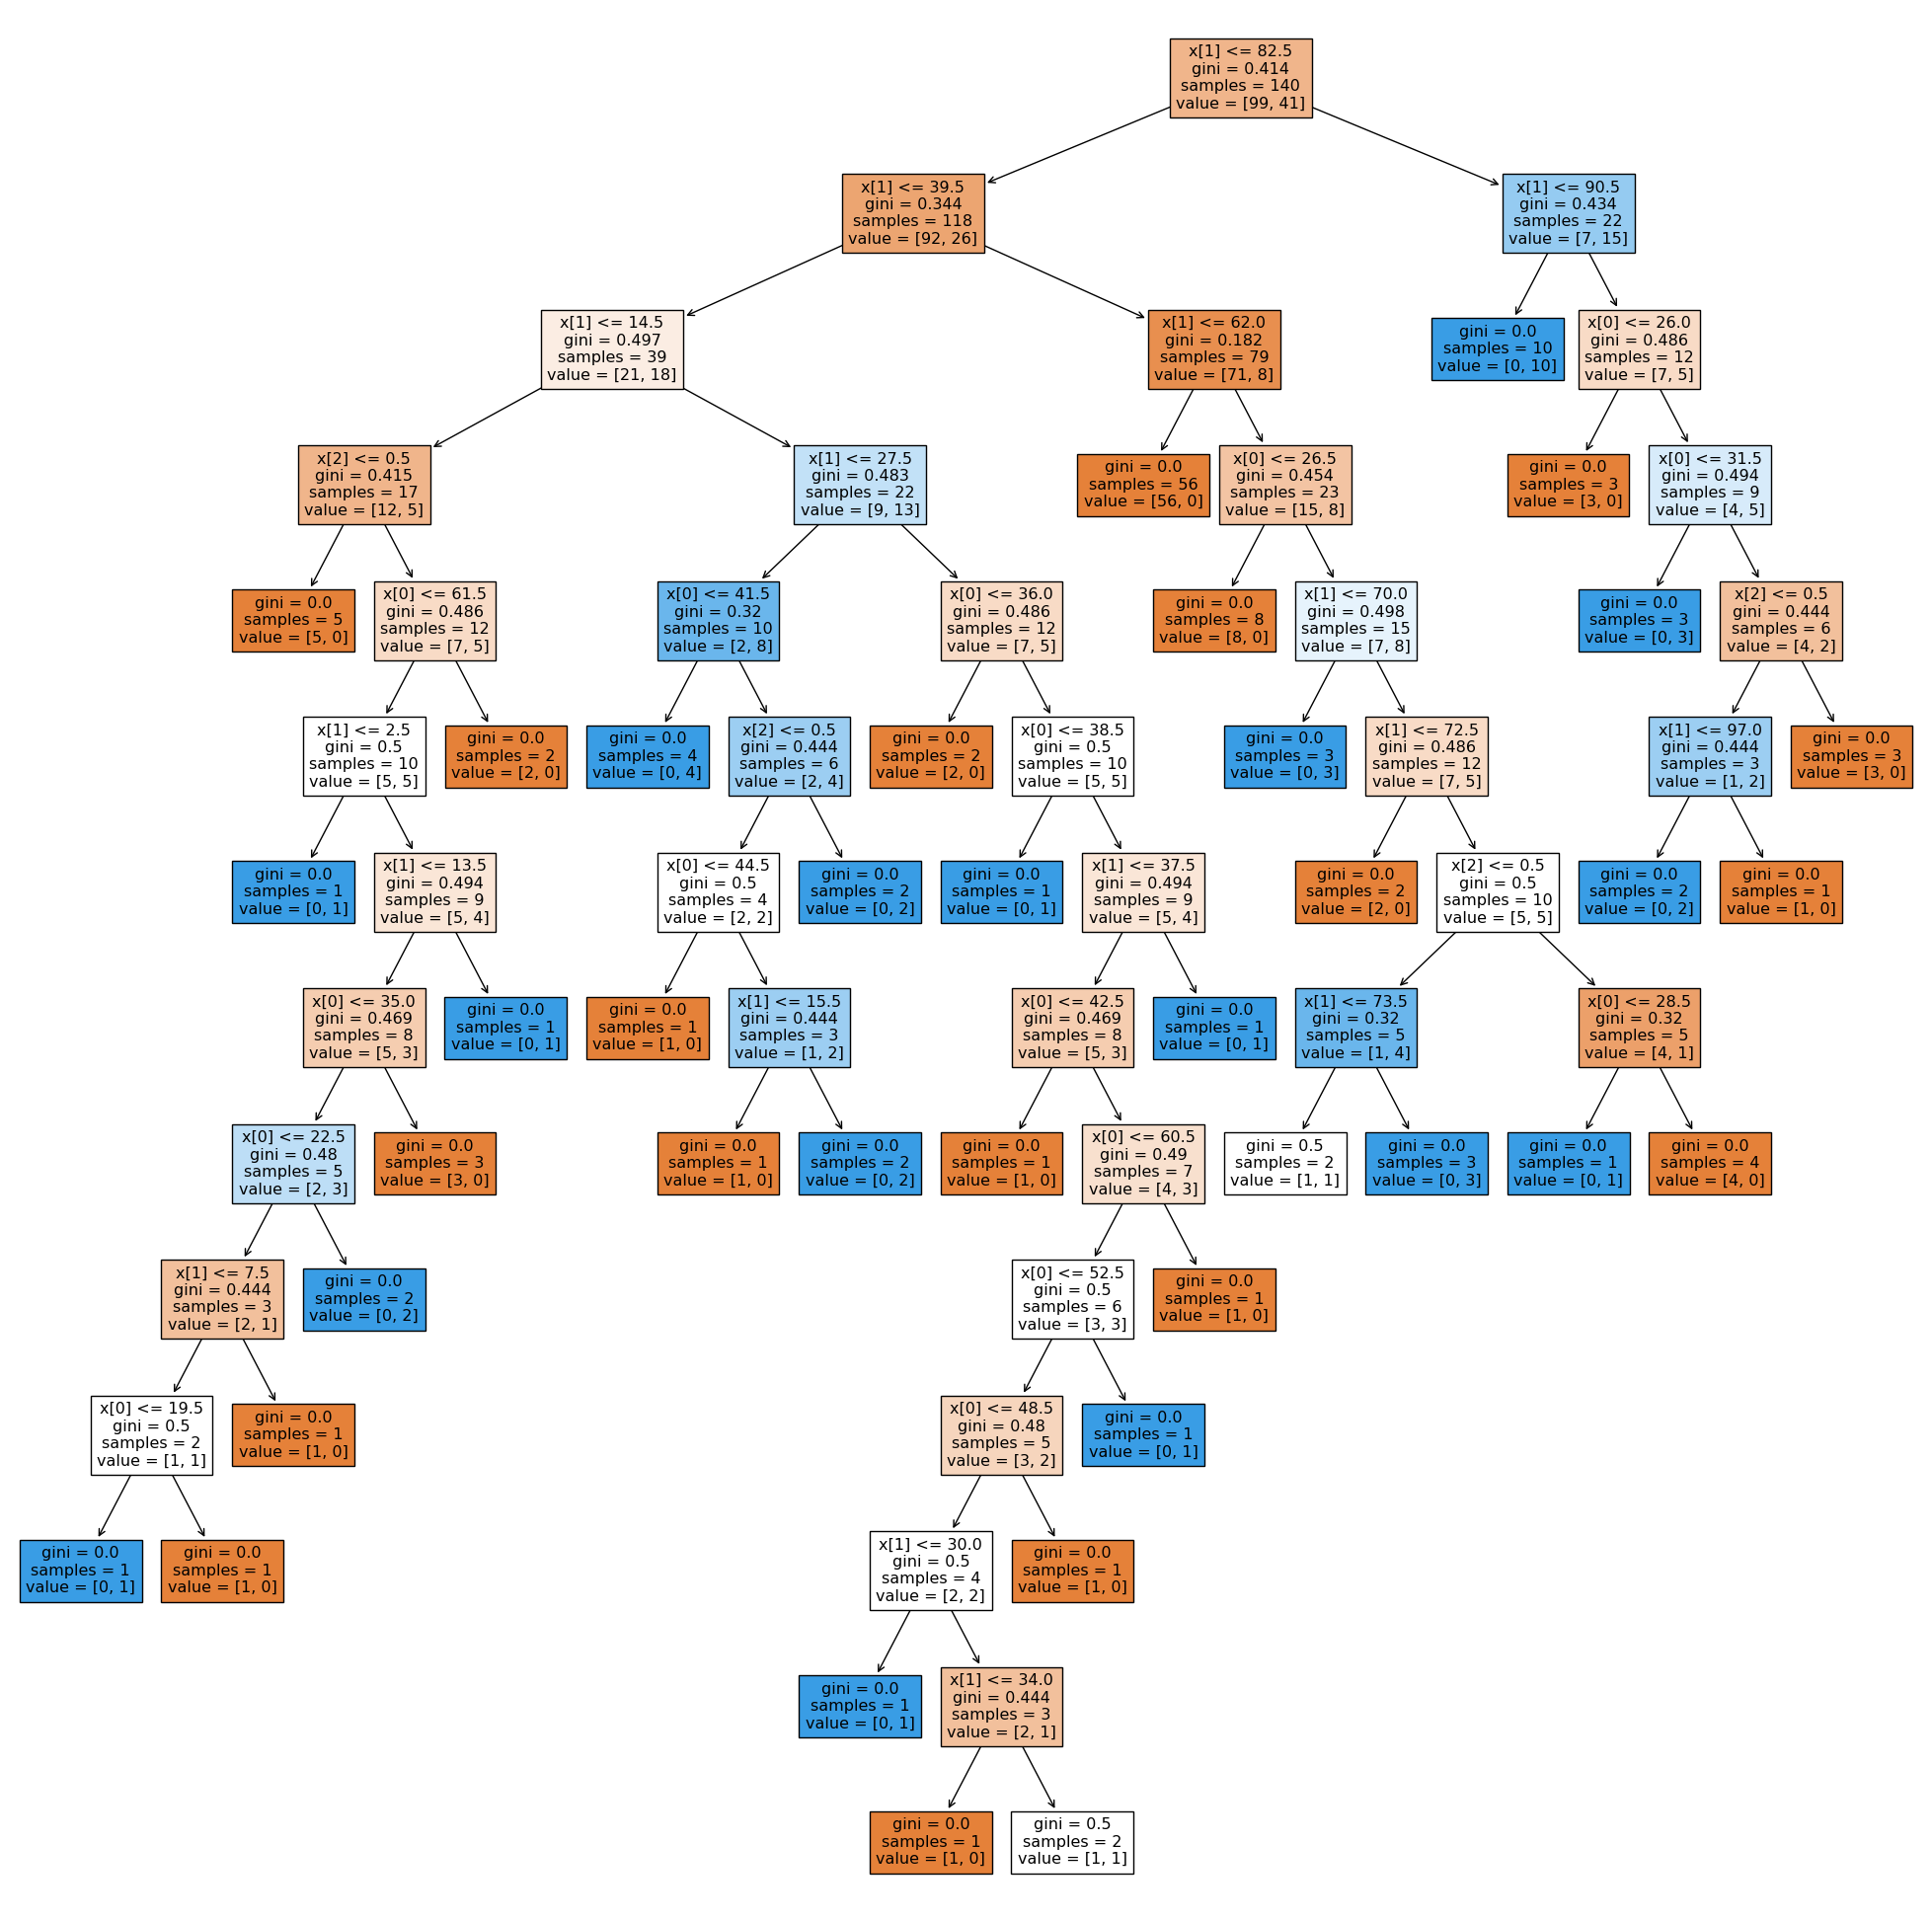

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,25))
plot_tree(clf, filled=True)
plt.show()

In [26]:

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier


param_dist = {"max_depth": randint(1,20),
              "max_features": randint(1, 20),
              "min_samples_leaf": randint(1, 20),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

tree_cv.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Accuracy is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'min_samples_leaf': 6}
Accuracy is 0.7571428571428571
